<a href="https://colab.research.google.com/github/AnirudhAchal/WEC-REC-ML-Task/blob/main/WebClub_Rec_ML_Part_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Building Predictive Models

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

In [ ]:
# Function to load_data
def load_data(train_file_name, test_file_name):
    # Mounting Google Drive
    drive.mount('/content/gdrive')
    # Importing Data
    train_df = pd.read_csv('gdrive/My Drive/wecrec2020/Data/' + train_file_name, index_col = 0)
    test_df = pd.read_csv('gdrive/My Drive/wecrec2020/Data/' + test_file_name, index_col = 0)

    features = []
    label = []

    for column in train_df.columns:
        if column != 'O/P':
            features.append(column)
        else:
            label.append(column)

    X = train_df.loc[:, features].to_numpy().astype('float')
    y = train_df.loc[:, label].to_numpy().astype('float').ravel()
    X_predict = test_df.loc[:, :].to_numpy().astype('float')

    # Performing Test Train Split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

    return X, y, X_train, y_train, X_test, y_test, X_predict, train_df, test_df


In [ ]:
# Function to load_data
def load_data_with_cv(train_file_name, test_file_name):
    # Mounting Google Drive
    drive.mount('/content/gdrive')
    # Importing Data
    train_df = pd.read_csv('gdrive/My Drive/wecrec2020/Data/' + train_file_name, index_col = 0)
    test_df = pd.read_csv('gdrive/My Drive/wecrec2020/Data/' + test_file_name, index_col = 0)

    features = []
    label = []

    for column in train_df.columns:
        if column != 'O/P':
            features.append(column)
        else:
            label.append(column)

    X = train_df.loc[:, features].to_numpy().astype('float')
    y = train_df.loc[:, label].to_numpy().astype('float').ravel()
    X_predict = test_df.loc[:, :].to_numpy().astype('float')

    # Performing Test Train Split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)
    X_train, X_cv_temp, y_train, y_cv_temp = train_test_split(X_train, y_train, test_size = 0.25, random_state = 1)

    return X, y, X_train, y_train, X_test, y_test, X_cv_temp, y_cv_temp, X_predict, train_df, test_df


In [ ]:
X, y, X_train, y_train, X_test, y_test, X_predict, train_df, test_df = load_data('Train_data_def_4.csv', 'Test_data_def_4.csv')

Mounted at /content/gdrive


In [ ]:
from sklearn.metrics import mean_squared_error
# Function to Test Model
def test_model(model, count, X_temp, y_temp):
    for i in range(count):
        # Test train split
        X_train_temp, X_test_temp, y_train_temp, y_test_temp = train_test_split(X_temp, y_temp, test_size = 0.2, random_state = i)

        # Fitting the model
        model.fit(X_train_temp, y_train_temp)
        
        # Making predictions and printing error
        y_predictions = np.maximum(model.predict(X_test_temp), np.ones(y_test_temp.shape[0]))
        
        print(f"Root Mean Square error of model Trial {i + 1}: ", mean_squared_error(y_predictions, y_test_temp, squared = False))

In [ ]:
def test_model_cv(model, X_temp, y_temp):
    y_predictions = model.predict(X_test)
    print(f"Root Mean Square error of model: ", mean_squared_error(y_predictions, y_temp, squared = False))

In [ ]:
# Function to get submission file
def get_prediction_file(model, filename, num):
    # Making predictions
    test_X = test_df.loc[:, :].to_numpy().astype('float')

    # For XGB
    # X_predict = xgb.DMatrix(test_X)
    predictions_y = (np.power(model.predict(X_predict), num))
    # predictions_y = np.power(np.maximum(model.predict(test_X), np.ones(test_X.shape[0])), num)

    # Setting up submission dataframe
    df_submission = pd.DataFrame({'Id' : test_df.index, 'PredictedValue' : predictions_y.ravel()})
    
    # Setting path
    submission_file_path = 'gdrive/My Drive/wecrec2020/SubmissionFiles/' + filename

    # write to the file
    df_submission.to_csv(submission_file_path, index = False)


In [ ]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    print('Model Performance')
    print('Root Mean Square Error: {:0.4f}'.format(mean_squared_error(predictions, test_labels, squared = False)))

In [ ]:
def compare_preditions(file1, file2):
    # Mounting Google Drive
    drive.mount('/content/gdrive')

    # Importing Data
    y1_df = pd.read_csv('gdrive/My Drive/wecrec2020/SubmissionFiles/' + file1, index_col = 0)
    y2_df = pd.read_csv('gdrive/My Drive/wecrec2020/SubmissionFiles/' + file2, index_col = 0)

    y1 = y1_df.to_numpy().astype('float').ravel()
    y2 = y2_df.to_numpy().astype('float').ravel()

    print(f"Root Mean Square error : ", mean_squared_error(y1, y2, squared = False))

In [ ]:
def plot_log(history, start):
    # summarize history for loss    
    plt.plot(history.history['loss'][start:])
    plt.plot(history.history['val_loss'][start:])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'cross validation'], loc='upper left')
    plt.show()

In [ ]:
def plot_log_xgb(history, start):
    # summarize history for loss    
    plt.plot(history['validation_0']['rmse'][start:])
    plt.plot(history['validation_1']['rmse'][start:])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'cross validation'], loc='upper left')
    plt.show()

In [ ]:
from sklearn.model_selection import cross_val_score

def cross_validate(model, X_temp, y_temp, num):
    scores = cross_val_score(model, X_temp, y_temp, cv = num)
    print(scores)


## Cat Boosting

In [ ]:
from catboost import CatBoostRegressor
from sklearn.model_selection import GridSearchCV

model = CatBoostRegressor()

# model.fit(X_train, y_train, use_best_model=True, eval_set=(X_test, y_test))

In [ ]:
param_grid = { 
    'depth'   : [4, 6, 8, 10, 12],
    'learning_rate' : [0.01, 0.05, 0.1],
    'iterations'    : [500]
}

In [ ]:
gs = model.grid_search(param_grid, X_train,
            y_train,
            cv = 5,
            shuffle = True,
            verbose=True,
            plot=False)

print(gs)


bestTest = 67.1637952
bestIteration = 499

0:	loss: 67.1637952	best: 67.1637952 (0)	total: 1.03s	remaining: 14.5s

bestTest = 46.17384381
bestIteration = 499

1:	loss: 46.1738438	best: 46.1738438 (1)	total: 2s	remaining: 13s

bestTest = 43.14531436
bestIteration = 497

2:	loss: 43.1453144	best: 43.1453144 (2)	total: 2.95s	remaining: 11.8s

bestTest = 52.08117875
bestIteration = 499

3:	loss: 52.0811788	best: 43.1453144 (2)	total: 4.34s	remaining: 11.9s

bestTest = 40.09243546
bestIteration = 498

4:	loss: 40.0924355	best: 40.0924355 (4)	total: 5.7s	remaining: 11.4s

bestTest = 39.51047446
bestIteration = 499

5:	loss: 39.5104745	best: 39.5104745 (5)	total: 7.13s	remaining: 10.7s

bestTest = 45.57876181
bestIteration = 499

6:	loss: 45.5787618	best: 39.5104745 (5)	total: 9.49s	remaining: 10.8s

bestTest = 38.52470944
bestIteration = 495

7:	loss: 38.5247094	best: 38.5247094 (7)	total: 11.8s	remaining: 10.4s

bestTest = 38.52126852
bestIteration = 290

8:	loss: 38.5212685	best: 38.52126

In [ ]:
# get_prediction_file(model, 'cat_boosting_3.csv', 1)
compare_preditions('tf_nn_1.15.csv', 'cat_boosting_3.csv')
evaluate(model, X_test, y_test)

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
Root Mean Square error :  64.84279584149799
Model Performance
Root Mean Square Error: 41.9138


In [ ]:
grid_search = GridSearchCV(estimator = model, param_grid = parameters, cv = 5, n_jobs = -1, verbose = 10)
grid_search.fit(X_train, y_train)
print(grid_search)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    4.4s
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:    5.7s
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    7.0s
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    9.7s
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   13.1s
[Parallel(n_jobs=-1)]: Done  57 tasks      | elapsed:   19.2s
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:   22.5s
[Parallel(n_jobs=-1)]: Done  81 tasks      | elapsed:   25.5s
[Parallel(n_jobs=-1)]: Done  94 tasks      | elapsed:   30.3s
[Parallel(n_jobs=-1)]: Done 109 tasks      | elapsed:   40.4s
[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed:   52.8s
[Parallel(n_jobs=-1)]: Done 141 tasks      | elapsed:  1

0:	learn: 154.9916187	total: 19.6ms	remaining: 3.91s
1:	learn: 143.7005913	total: 34.4ms	remaining: 3.41s
2:	learn: 133.1468170	total: 48.9ms	remaining: 3.21s
3:	learn: 124.1282100	total: 63.5ms	remaining: 3.11s
4:	learn: 117.0607391	total: 77.7ms	remaining: 3.03s
5:	learn: 109.2939920	total: 92.6ms	remaining: 2.99s
6:	learn: 102.3635168	total: 107ms	remaining: 2.95s
7:	learn: 96.7912108	total: 121ms	remaining: 2.92s
8:	learn: 91.5085249	total: 136ms	remaining: 2.89s
9:	learn: 86.0282334	total: 150ms	remaining: 2.86s
10:	learn: 81.6610311	total: 169ms	remaining: 2.9s
11:	learn: 77.4841756	total: 183ms	remaining: 2.87s
12:	learn: 74.2578451	total: 198ms	remaining: 2.84s
13:	learn: 71.2547260	total: 213ms	remaining: 2.82s
14:	learn: 68.5443359	total: 231ms	remaining: 2.84s
15:	learn: 65.9529279	total: 245ms	remaining: 2.82s
16:	learn: 64.1384577	total: 260ms	remaining: 2.8s
17:	learn: 62.0416938	total: 274ms	remaining: 2.77s
18:	learn: 60.2292764	total: 289ms	remaining: 2.75s
19:	learn: 

In [ ]:
best_grid = grid_search.best_estimator_
print(best_grid)
grid_accuracy = evaluate(best_grid, X_test, y_test)

Model Performance
Root Mean Square Error: 42.2259


In [ ]:
# get_prediction_file(model, 'cat_boosting_2.csv', 1)
compare_preditions('baseline.csv', 'cat_boosting_1.csv')
# evaluate(model, X_test, y_test)

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
Root Mean Square error :  36.81152920185541


## Random Forest Regressor Hyper Parameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# Create the parameter grid based on the results of random search 
"""
param_grid = {
    'bootstrap': [True],
    'max_depth': [10, 15, 20, 25, 30],
    'min_samples_leaf': [1, 2, 3, 4, 5],
    'min_samples_split': [1, 2, 3, 4, 5],
    'n_estimators': [40, 45, 50, 55]
}
"""
param_grid = {
    'max_depth': [10, 20, 30, 40, 50, 60],
    'n_estimators': [90, 100, 110, 120, 130], 
    'random_state' : [47],
}

# Create a based model
rf = RandomForestRegressor()
# Instantiate the grid search model

grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 5, n_jobs = -1, verbose = 10)

grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    4.5s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    8.2s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   19.6s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:   28.8s
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:   47.2s
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done  57 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done  81 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done  94 tasks      | elapsed:  4.8min
[Parallel(n_jobs=-1)]: Done 109 tasks      | elapsed:  5.7min
[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed:  6.6min
[Parallel(n_jobs=-1)]: Done 141 tasks      | elapsed:  7

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [ ]:
best_grid = grid_search.best_estimator_
print(best_grid)
best_grid.fit(X_train, y_train)
grid_accuracy = evaluate(best_grid, X_test, y_test)
# get_prediction_file(best_grid, 'rfr_1.0.csv', 1)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=30, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=120, n_jobs=None, oob_score=False,
                      random_state=47, verbose=0, warm_start=False)
Model Performance
Root Mean Square Error: 46.9413


In [ ]:
# get_prediction_file(best_grid, 'rfr_1.2.csv', 1)

In [ ]:
compare_preditions('nn_1.1.csv', 'rfr_1.2.csv')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
Root Mean Square error :  56.386839460452144


## XGBoost Hyper Parameter Tuning

In [ ]:
import xgboost as xgb

dtrain = xgb.DMatrix(X_train, label = y_train)
dtest = xgb.DMatrix(X_test, label = y_test)

In [ ]:
params = {
    # Parameters that we are going to tune.
    'max_depth':6,
    'min_child_weight': 1,
    'eta':.3,
    'subsample': 1,
    'colsample_bytree': 1,
    # Other parameters
    'objective': 'reg:squarederror',
    'eval_metric': 'rmse'
}

num_boost_rounds = 10000

In [ ]:
xgb_model = xgb.train(
    params,
    dtrain,
    num_boost_round = num_boost_rounds,
    evals = [(dtest, "Test")],
    early_stopping_rounds = 10
)

print("Best RSME: {:.2f} with {} rounds".format(
                 xgb_model.best_score,
                 xgb_model.best_iteration+1))

[0]	Test-rmse:183.42
Will train until Test-rmse hasn't improved in 10 rounds.
[1]	Test-rmse:143.287
[2]	Test-rmse:112.618
[3]	Test-rmse:92.9844
[4]	Test-rmse:81.0339
[5]	Test-rmse:73.7998
[6]	Test-rmse:63.7909
[7]	Test-rmse:58.1483
[8]	Test-rmse:55.7812
[9]	Test-rmse:53.6665
[10]	Test-rmse:51.0987
[11]	Test-rmse:50.4917
[12]	Test-rmse:49.841
[13]	Test-rmse:48.5834
[14]	Test-rmse:48.003
[15]	Test-rmse:47.6437
[16]	Test-rmse:47.5887
[17]	Test-rmse:47.397
[18]	Test-rmse:47.3674
[19]	Test-rmse:47.2357
[20]	Test-rmse:47.1751
[21]	Test-rmse:47.0788
[22]	Test-rmse:46.7316
[23]	Test-rmse:46.6868
[24]	Test-rmse:46.6303
[25]	Test-rmse:46.654
[26]	Test-rmse:46.7294
[27]	Test-rmse:46.741
[28]	Test-rmse:46.6241
[29]	Test-rmse:46.7042
[30]	Test-rmse:46.7313
[31]	Test-rmse:46.7312
[32]	Test-rmse:46.7387
[33]	Test-rmse:46.7837
[34]	Test-rmse:46.7879
[35]	Test-rmse:46.8069
[36]	Test-rmse:46.8479
[37]	Test-rmse:46.7126
[38]	Test-rmse:46.5961
[39]	Test-rmse:46.372
[40]	Test-rmse:46.3638
[41]	Test-rmse:46

In [ ]:
cv_results = xgb.cv(
    params,
    dtrain,
    num_boost_round = num_boost_rounds,
    seed = 42,
    nfold = 5,
    metrics = {'rmse'},
    early_stopping_rounds=10
)
cv_results

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,181.528549,0.858501,181.747812,4.472988
1,141.939700,0.619537,142.624042,3.956471
2,116.030864,0.679220,116.918434,3.730750
3,96.464699,1.866021,97.679367,3.713804
4,82.185753,1.520375,83.661528,3.296345
...,...,...,...,...
71,29.616743,0.213471,46.561012,1.028374
72,29.476709,0.184039,46.553567,1.024625
73,29.306464,0.186850,46.571797,1.021003
74,29.131260,0.141048,46.568945,0.992593


In [ ]:
cv_results['test-rmse-mean'].min()

50.105387

In [ ]:
gridsearch_params = [
    (max_depth, min_child_weight)
    for max_depth in np.arange(4, 10, 1)
    for min_child_weight in np.arange(1, 14, 2)
]

min_rmse = float("Inf")
best_params = None

for max_depth, min_child_weight in gridsearch_params:
    print("CV with max_depth={}, min_child_weight={}".format(max_depth, min_child_weight))
    # Update our parameters
    params['max_depth'] = max_depth
    params['min_child_weight'] = min_child_weight
    # Run CV
    cv_results = xgb.cv(
        params,
        dtrain,
        num_boost_round=num_boost_rounds,
        seed = 42,
        nfold = 5,
        metrics={'rmse'},
        early_stopping_rounds = 10
    )
    # Update best rmse

    mean_rmse = cv_results['test-rmse-mean'].min()
    boost_rounds = cv_results['test-rmse-mean'].argmin()

    print("\tRMSE {} for {} rounds".format(mean_rmse, boost_rounds))
    if mean_rmse < min_rmse:
        min_rmse = mean_rmse
        best_params = (max_depth,min_child_weight)
print("Best params: {}, {}, RMSE: {}".format(best_params[0], best_params[1], min_rmse))

CV with max_depth=4, min_child_weight=1
	RMSE 48.7211854 for 157 rounds
CV with max_depth=4, min_child_weight=3
	RMSE 48.539842199999995 for 141 rounds
CV with max_depth=4, min_child_weight=5
	RMSE 48.72851200000001 for 137 rounds
CV with max_depth=4, min_child_weight=7
	RMSE 48.9348282 for 117 rounds
CV with max_depth=4, min_child_weight=9
	RMSE 49.127796000000004 for 114 rounds
CV with max_depth=4, min_child_weight=11
	RMSE 49.0429116 for 105 rounds
CV with max_depth=4, min_child_weight=13
	RMSE 48.974035 for 138 rounds
CV with max_depth=5, min_child_weight=1
	RMSE 47.4528572 for 73 rounds
CV with max_depth=5, min_child_weight=3
	RMSE 47.7202948 for 59 rounds
CV with max_depth=5, min_child_weight=5
	RMSE 47.5185274 for 85 rounds
CV with max_depth=5, min_child_weight=7
	RMSE 47.2230972 for 95 rounds
CV with max_depth=5, min_child_weight=9
	RMSE 47.143596599999995 for 87 rounds
CV with max_depth=5, min_child_weight=11
	RMSE 47.3278908 for 61 rounds
CV with max_depth=5, min_child_weight

In [ ]:
params['max_depth'] = 8
params['min_child_weight'] = 7

In [ ]:
gridsearch_params = [
    (subsample, colsample)
    for subsample in [i/20. for i in range(10,21)]
    for colsample in [i/20. for i in range(10,21)]
]

In [ ]:
min_rmse = float("Inf")
best_params = None
# We start by the largest values and go down to the smallest
for subsample, colsample in reversed(gridsearch_params):
    print("CV with subsample={}, colsample={}".format(subsample, colsample))
    # We update our parameters
    params['subsample'] = subsample
    params['colsample_bytree'] = colsample
    # Run CV
    cv_results = xgb.cv(
        params,
        dtrain,
        num_boost_round=num_boost_rounds,
        seed=42,
        nfold=5,
        metrics={'rmse'},
        early_stopping_rounds=10
    )
    # Update best score
    mean_rmse = cv_results['test-rmse-mean'].min()
    boost_rounds = cv_results['test-rmse-mean'].argmin()
    print("\tRMSE {} for {} rounds".format(mean_rmse, boost_rounds))
    if mean_rmse < min_rmse:
        min_rmse = mean_rmse
        best_params = (subsample,colsample)
print("Best params: {}, {}, RMSE: {}".format(best_params[0], best_params[1], min_rmse))

CV with subsample=1.0, colsample=1.0
	RMSE 45.1061744 for 22 rounds
CV with subsample=1.0, colsample=0.95
	RMSE 45.4312446 for 22 rounds
CV with subsample=1.0, colsample=0.9
	RMSE 45.4312446 for 22 rounds
CV with subsample=1.0, colsample=0.85
	RMSE 45.8467156 for 25 rounds
CV with subsample=1.0, colsample=0.8
	RMSE 45.8467156 for 25 rounds
CV with subsample=1.0, colsample=0.75
	RMSE 46.404855399999995 for 31 rounds
CV with subsample=1.0, colsample=0.7
	RMSE 46.404855399999995 for 31 rounds
CV with subsample=1.0, colsample=0.65
	RMSE 46.9056762 for 31 rounds
CV with subsample=1.0, colsample=0.6
	RMSE 46.9056762 for 31 rounds
CV with subsample=1.0, colsample=0.55
	RMSE 48.8979774 for 65 rounds
CV with subsample=1.0, colsample=0.5
	RMSE 48.8979774 for 65 rounds
CV with subsample=0.95, colsample=1.0
	RMSE 45.156444 for 20 rounds
CV with subsample=0.95, colsample=0.95
	RMSE 45.5187516 for 24 rounds
CV with subsample=0.95, colsample=0.9
	RMSE 45.5187516 for 24 rounds
CV with subsample=0.95, 

In [ ]:
params['subsample'] = 1.0
params['colsample_bytree'] = 1.0

In [ ]:
min_rmse = float("Inf")
best_params = None
for eta in [.3, .2, .1, .05, 0.02, 0.01]:
    print("CV with eta={}".format(eta))
    # We update our parameters
    params['eta'] = eta
    # Run and time CV
    cv_results = xgb.cv(
            params,
            dtrain,
            num_boost_round=num_boost_rounds,
            seed=42,
            nfold=5,
            metrics=['rmse'],
            early_stopping_rounds=10
          )
    # Update best score
    mean_rmse = cv_results['test-rmse-mean'].min()
    boost_rounds = cv_results['test-rmse-mean'].argmin()
    print("\tRMSE {} for {} rounds\n".format(mean_rmse, boost_rounds))
    if mean_rmse < min_rmse:
        min_rmse = mean_rmse
        best_params = eta
print("Best params: {}, RMSE: {}".format(best_params, min_rmse))

CV with eta=0.3
	RMSE 45.1061744 for 22 rounds

CV with eta=0.2
	RMSE 44.660758400000006 for 35 rounds

CV with eta=0.1
	RMSE 43.7749008 for 88 rounds

CV with eta=0.05
	RMSE 43.898281000000004 for 166 rounds

CV with eta=0.02
	RMSE 43.636628800000004 for 414 rounds

CV with eta=0.01
	RMSE 43.66479339999999 for 834 rounds

Best params: 0.02, RMSE: 43.636628800000004


In [ ]:
params['eta'] = 0.02

In [ ]:
gridsearch_params = [
    (reg_lambda)
    for reg_lambda in np.arange(0, 1, 0.1)
]

In [ ]:
min_rmse = float("Inf")
best_params = None
# We start by the largest values and go down to the smallest
for reg_lambda in gridsearch_params:
    print("CV with reg_lambda={}".format(reg_lambda))
    # We update our parameters
    params['reg_lambda'] = reg_lambda

    # Run CV
    cv_results = xgb.cv(
        params,
        dtrain,
        num_boost_round=num_boost_rounds,
        seed=42,
        nfold=5,
        metrics={'rmse'},
        early_stopping_rounds=10
    )
    # Update best score
    mean_rmse = cv_results['test-rmse-mean'].min()
    boost_rounds = cv_results['test-rmse-mean'].argmin()
    print("\tRMSE {} for {} rounds".format(mean_rmse, boost_rounds))
    if mean_rmse < min_rmse:
        min_rmse = mean_rmse
        best_params = reg_lambda
print("Best params: {}, RMSE: {}".format(best_params, min_rmse))

CV with reg_lambda=0.0
	RMSE 43.7262282 for 412 rounds
CV with reg_lambda=0.1
	RMSE 43.7215774 for 398 rounds
CV with reg_lambda=0.2
	RMSE 43.6654158 for 455 rounds
CV with reg_lambda=0.30000000000000004
	RMSE 43.620297199999996 for 484 rounds
CV with reg_lambda=0.4
	RMSE 43.6448434 for 440 rounds
CV with reg_lambda=0.5
	RMSE 43.7540412 for 451 rounds
CV with reg_lambda=0.6000000000000001
	RMSE 43.6051308 for 425 rounds
CV with reg_lambda=0.7000000000000001
	RMSE 43.683741000000005 for 407 rounds
CV with reg_lambda=0.8
	RMSE 43.662638199999996 for 435 rounds
CV with reg_lambda=0.9
	RMSE 43.655614 for 420 rounds
Best params: 0.6000000000000001, RMSE: 43.6051308


In [ ]:
params['reg_lambda'] = 0.02

In [ ]:
best_model = xgb.train(
    params,
    dtrain,
    num_boost_round=num_boost_rounds,
    evals=[(dtest, "Test")],
    early_stopping_rounds = 10
)

[0]	Test-rmse:240.231
Will train until Test-rmse hasn't improved in 10 rounds.
[1]	Test-rmse:235.759
[2]	Test-rmse:231.405
[3]	Test-rmse:227.119
[4]	Test-rmse:222.946
[5]	Test-rmse:218.829
[6]	Test-rmse:214.802
[7]	Test-rmse:210.867
[8]	Test-rmse:207.021
[9]	Test-rmse:203.275
[10]	Test-rmse:199.579
[11]	Test-rmse:195.987
[12]	Test-rmse:192.474
[13]	Test-rmse:189.002
[14]	Test-rmse:185.641
[15]	Test-rmse:182.348
[16]	Test-rmse:179.091
[17]	Test-rmse:175.947
[18]	Test-rmse:172.847
[19]	Test-rmse:169.85
[20]	Test-rmse:166.892
[21]	Test-rmse:164.018
[22]	Test-rmse:161.212
[23]	Test-rmse:158.454
[24]	Test-rmse:155.779
[25]	Test-rmse:153.128
[26]	Test-rmse:150.514
[27]	Test-rmse:147.981
[28]	Test-rmse:145.535
[29]	Test-rmse:143.119
[30]	Test-rmse:140.784
[31]	Test-rmse:138.452
[32]	Test-rmse:136.199
[33]	Test-rmse:134.03
[34]	Test-rmse:131.852
[35]	Test-rmse:129.757
[36]	Test-rmse:127.699
[37]	Test-rmse:125.65
[38]	Test-rmse:123.688
[39]	Test-rmse:121.778
[40]	Test-rmse:119.894
[41]	Test-rms

In [ ]:
# get_prediction_file(best_model, 'XGB_1.10.csv', 1)
compare_preditions('XGB_1.10.csv', 'nn_1.1.csv')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
Root Mean Square error :  49.210728490132


##Temp Workspace

In [ ]:
from xgboost import XGBRegressor

param = {'max_depth': 10, 'eta': 10, 'objective': 'reg:squarederror', 'eval_metric' : 'rmse', 'n_estimators' : 400, 'reg_lambda' : 100, 'min_child_weight': 70, 'subsample' : 1, 'reg_alpha' : 50}

clf = XGBRegressor(**param)

clf.fit(X_train, y_train, eval_set = [(X_train, y_train), (X_test, y_test)], eval_metric = 'rmse', verbose = True)

evals_result = clf.evals_result()

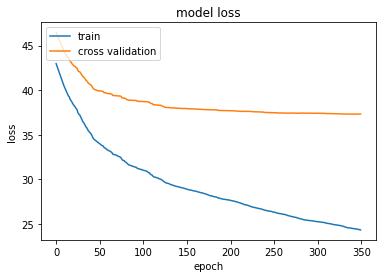

Root Mean Square error of model Trial :  37.314991314581725


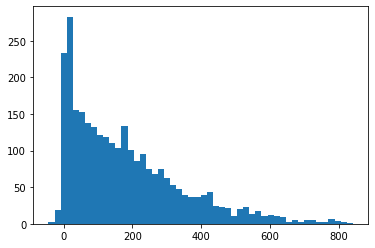

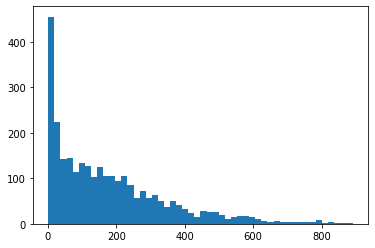

In [ ]:
plot_log_xgb(evals_result, 50)
print(f"Root Mean Square error of model Trial : ", mean_squared_error(np.power(clf.predict(X_test), 1), np.power(y_test, 1), squared = False))
plt.hist(np.power(clf.predict(X_test), 1), bins = 50)
plt.show()

plt.hist(np.power(y_test, 1), bins = 50)
plt.show()
# get_prediction_file(clf, 'XGB_1.5.csv', 2)

In [ ]:
clf = XGBRegressor(colsample_bytree=0.4,
                 gamma=0,                 
                 learning_rate=0.07,
                 max_depth=3,
                 min_child_weight=1.5,
                 n_estimators=1000,                                                                    
                 reg_alpha=0.75,
                 reg_lambda=0.45,
                 subsample=0.6,
                 seed=42)
clf.fit(X_train, y_train, eval_set = [(X_train, y_train), (X_test, y_test)], eval_metric = 'rmse', verbose = True)

evals_result = clf.evals_result()

[09:37:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:231.143	validation_1-rmse:234.035
[1]	validation_0-rmse:222.094	validation_1-rmse:224.878
[2]	validation_0-rmse:213.216	validation_1-rmse:215.774
[3]	validation_0-rmse:205.464	validation_1-rmse:207.878
[4]	validation_0-rmse:195.665	validation_1-rmse:197.967
[5]	validation_0-rmse:188.961	validation_1-rmse:191.077
[6]	validation_0-rmse:183.031	validation_1-rmse:185.008
[7]	validation_0-rmse:175.322	validation_1-rmse:177.194
[8]	validation_0-rmse:170.129	validation_1-rmse:171.827
[9]	validation_0-rmse:165.592	validation_1-rmse:167.152
[10]	validation_0-rmse:159.217	validation_1-rmse:160.681
[11]	validation_0-rmse:153.586	validation_1-rmse:154.988
[12]	validation_0-rmse:150.255	validation_1-rmse:151.522
[13]	validation_0-rmse:147.632	validation_1-rmse:148.896
[14]	validation_0-rmse:144.707	validation_1-rmse:145.773
[15]	validation_0-rmse:142.2

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout

model = Sequential()
model.add(Flatten())
model.add(Dense(1200, activation = tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(1, activation  = tf.nn.relu))

model.compile(optimizer = 'adam' , loss = 'mse', metrics = ['mse'])

history = model.fit(X_train, y_train, epochs = 50, batch_size = 10,  validation_data=(X_test, y_test))

Epoch 1/50
1120/1120 [==============================] - 3s 2ms/step - loss: 58193.0352 - mse: 58193.0352 - val_loss: 59279.1094 - val_mse: 59279.1094
Epoch 2/50
1120/1120 [==============================] - 3s 2ms/step - loss: 57448.8555 - mse: 57448.8555 - val_loss: 58536.3047 - val_mse: 58536.3047
Epoch 3/50
1120/1120 [==============================] - 3s 2ms/step - loss: 56724.5664 - mse: 56724.5664 - val_loss: 57808.3242 - val_mse: 57808.3242
Epoch 4/50
1120/1120 [==============================] - 3s 2ms/step - loss: 56014.2188 - mse: 56014.2188 - val_loss: 57094.8906 - val_mse: 57094.8906
Epoch 5/50
1120/1120 [==============================] - 3s 2ms/step - loss: 55309.1016 - mse: 55309.1094 - val_loss: 56390.3672 - val_mse: 56390.3672
Epoch 6/50
1120/1120 [==============================] - 3s 2ms/step - loss: 54632.5273 - mse: 54632.5273 - val_loss: 55696.4453 - val_mse: 55696.4453
Epoch 7/50
1120/1120 [==============================] - 3s 2ms/step - loss: 53975.3438 - mse: 53975.

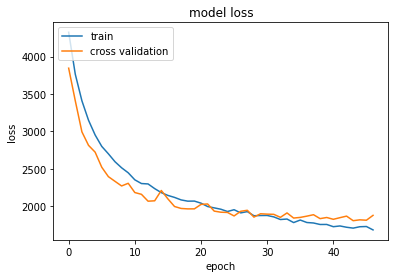

Root Mean Square error of model Trial :  43.34041625900576


In [ ]:
plot_log(history, 3)
print(f"Root Mean Square error of model Trial : ", mean_squared_error(np.power(model.predict(X_test), 1), np.power(y_test, 1), squared = False))

In [ ]:
# get_prediction_file(model, 'tf_nn_1.19.csv', 1)
compare_preditions('baseline.csv', 'tf_nn_1.15.csv')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
Root Mean Square error :  59.62900602981666


In [ ]:
test_model(clf, 10, X, y)

Root Mean Square error of model Trial 1:  47.29389931873275
Root Mean Square error of model Trial 2:  48.108931604377986
Root Mean Square error of model Trial 3:  46.72156113819514
Root Mean Square error of model Trial 4:  48.340036969149565
Root Mean Square error of model Trial 5:  47.73827924281507
Root Mean Square error of model Trial 6:  47.98540027241363
Root Mean Square error of model Trial 7:  45.837114726402625
Root Mean Square error of model Trial 8:  49.95135926360435
Root Mean Square error of model Trial 9:  47.68708938679446
Root Mean Square error of model Trial 10:  47.6157601681869


In [ ]:
print(f"Root Mean Square error : ", mean_squared_error(np.power(clf.predict(X_test), 3), np.power(y_test, 3), squared = False))

Root Mean Square error :  52.573869443620985


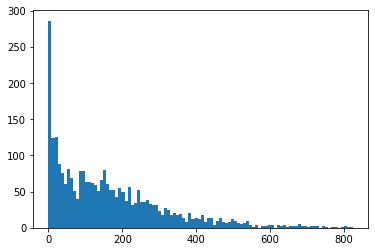

In [ ]:
plt.hist(np.power(model.predict(X_test), 3), bins = 100)
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestRegressor

def get_best_rand_state(end):
    best_cost = 100000
    for state in range(end):
        rf = RandomForestRegressor(n_estimators = 50, random_state = state)
        rf.fit(X_train, y_train)
        print(f"Root Mean Square error : ", mean_squared_error(rf.predict(X_test), y_test, squared = False))

        cost = mean_squared_error(rf.predict(X_test), y_test, squared = False)

        if cost < best_cost:
            best_cost = cost
            best_state = state
            print("Best new state : ", best_state)

    return best_state, best_cost
        

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators = 150, random_state = 1, max_depth = 40, )

rf.fit(X_train, y_train)

print(f"Root Mean Square error : ", mean_squared_error(rf.predict(X_test), y_test, squared = False))

Root Mean Square error :  51.909629255538235


In [ ]:
get_best_rand_state(10)

Root Mean Square error :  53.06321881222702
Best new state :  0
Root Mean Square error :  52.30888161952722
Best new state :  1
Root Mean Square error :  52.79042641426567
Root Mean Square error :  52.72912457754522
Root Mean Square error :  52.788632063568905
Root Mean Square error :  52.3101302931441
Root Mean Square error :  52.80008734435415
Root Mean Square error :  51.94963188512502
Best new state :  7
Root Mean Square error :  51.76451818848228
Best new state :  8
Root Mean Square error :  52.08682905358264


(8, 51.76451818848228)

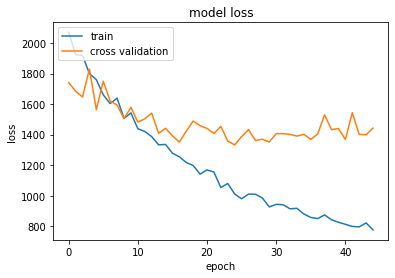

In [ ]:
plot_log(history, 5)

Root Mean Square error :  51.78620347092341


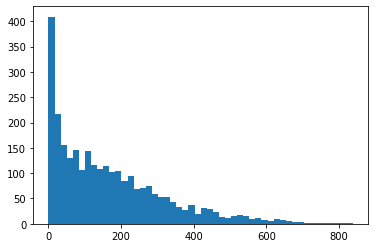

In [ ]:
print(f"Root Mean Square error : ", mean_squared_error(np.power(model.predict(X_test), 3), np.power(y_test, 3), squared = False))
plt.hist(np.power(model.predict(X_test), 3), bins = 50)
plt.show()

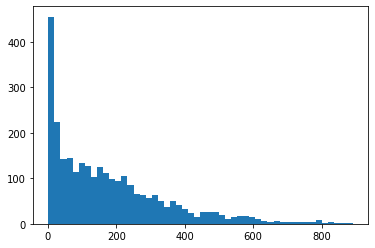

In [ ]:
plt.hist(np.power(y_test, 3), bins = 50)
plt.show()

In [ ]:
# get_prediction_file(clf, 'XGB_1.6.csv', 1)
compare_preditions('nn_1.1.csv', 'XGB_1.6.csv')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
Root Mean Square error :  49.533369466424176


## Dummy Model

In [ ]:
from sklearn.dummy import DummyRegressor

dummy_model = DummyRegressor(strategy = "mean")

test_model(dummy_model, 1, X, y)

Root Mean Square error of model Trial 1:  168.89209248422196


## Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression

lr_model_1 = LinearRegression()

test_model(lr_model_1, 1, X, y)

Root Mean Square error of model Trial 1:  94.06468348683387


## Lasso Regression

In [ ]:
from sklearn.linear_model import Lasso

clf = Lasso(alpha=1, max_iter=100000)

test_model(clf, 1, X, y)

Root Mean Square error of model Trial 1:  97.87048722085213


## Neural Networks (MLP Regressor)

In [ ]:
    from sklearn.neural_network import MLPRegressor

regr_1 = MLPRegressor(random_state = 1, max_iter = 10000)

test_model(regr_1, 1, X, y)

Root Mean Square error of model Trial 1:  46.60812489648631


In [ ]:
# get_prediction_file(regr_1, 'nn_1.3.csv', 1)
compare_preditions('tf_nn_1.15.csv', 'nn_1.3.csv')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
Root Mean Square error :  99.24587927912988


In [ ]:
regr_2 = MLPRegressor(random_state = 1, hidden_layer_sizes = (500,), max_iter = 10000)

test_model(regr_2, 1, X, y)

## TensorFlow

In [ ]:
import tensorflow as tf

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout

model = Sequential()
model.add(Flatten())
model.add(Dense(500, activation = tf.nn.relu))
model.add(Dense(200, activation = tf.nn.relu))
model.add(Dense(100, activation = tf.nn.relu))
model.add(Dropout(0.3))
model.add(Dense(1, activation = tf.nn.relu))

model.compile(optimizer = 'adam' , loss = 'mse', metrics = ['mse'])

history = model.fit(X_train, y_train, epochs = 10, batch_size = 10,  validation_data=(X_test, y_test))

Epoch 1/10
1120/1120 [==============================] - 3s 3ms/step - loss: 58649.6328 - mse: 58649.6328 - val_loss: 60106.4570 - val_mse: 60106.4570
Epoch 2/10
1120/1120 [==============================] - 3s 3ms/step - loss: 58623.3125 - mse: 58623.3125 - val_loss: 60106.4570 - val_mse: 60106.4570
Epoch 3/10
1120/1120 [==============================] - 3s 3ms/step - loss: 58623.0508 - mse: 58623.0508 - val_loss: 60106.4570 - val_mse: 60106.4570
Epoch 4/10
1120/1120 [==============================] - 3s 3ms/step - loss: 58623.0625 - mse: 58623.0625 - val_loss: 60106.4570 - val_mse: 60106.4570
Epoch 5/10
1120/1120 [==============================] - 3s 3ms/step - loss: 58623.0156 - mse: 58623.0156 - val_loss: 60106.4570 - val_mse: 60106.4570
Epoch 6/10
1120/1120 [==============================] - 3s 3ms/step - loss: 58623.1250 - mse: 58623.1250 - val_loss: 60106.4570 - val_mse: 60106.4570
Epoch 7/10
1120/1120 [==============================] - 3s 3ms/step - loss: 58623.0469 - mse: 58623.

In [ ]:
model = Sequential()
model.add(Flatten())
model.add(Dense(100, activation = tf.nn.relu))
model.add(Dense(100, activation = tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(1, activation = tf.nn.relu))

model.compile(optimizer = 'adam' , loss = 'mse', metrics = ['mse'])

history = model.fit(X_train, y_train, epochs = 10, batch_size = 10,  validation_data=(X_test, y_test))

Epoch 1/10
1120/1120 [==============================] - 2s 2ms/step - loss: 58700.0391 - mse: 58700.0391 - val_loss: 59941.6133 - val_mse: 59941.6133
Epoch 2/10
1120/1120 [==============================] - 2s 2ms/step - loss: 58294.4961 - mse: 58294.4961 - val_loss: 59685.8359 - val_mse: 59685.8359
Epoch 3/10
1120/1120 [==============================] - 2s 1ms/step - loss: 58150.7500 - mse: 58150.7500 - val_loss: 59561.4219 - val_mse: 59561.4219
Epoch 4/10
1120/1120 [==============================] - 2s 1ms/step - loss: 58086.3242 - mse: 58086.3242 - val_loss: 59508.0391 - val_mse: 59508.0391
Epoch 5/10
1120/1120 [==============================] - 2s 1ms/step - loss: 57933.2930 - mse: 57933.2930 - val_loss: 59334.1719 - val_mse: 59334.1719
Epoch 6/10
1120/1120 [==============================] - 2s 1ms/step - loss: 57578.1484 - mse: 57578.1484 - val_loss: 58777.3828 - val_mse: 58777.3828
Epoch 7/10
1120/1120 [==============================] - 2s 2ms/step - loss: 57420.5391 - mse: 57420.

## XGBoost

In [ ]:
import xgboost as xgb

dtrain = xgb.DMatrix(X_train, label = y_train)
dtest = xgb.DMatrix(X_test, label = y_test)

evallist = [(dtrain, 'train'), (dtest, 'eval'), ]
param = {'max_depth': 6, 'eta': 1, 'objective': 'reg:squarederror', 'eval_metric' : 'rmse'}

num_round = 100
bst = xgb.train(param, dtrain, num_round, evallist)


[0]	train-rmse:90.9781	eval-rmse:92.8351
[1]	train-rmse:60.2441	eval-rmse:63.5301
[2]	train-rmse:54.0601	eval-rmse:57.9078
[3]	train-rmse:49.6423	eval-rmse:54.3912
[4]	train-rmse:48.0811	eval-rmse:54.0477
[5]	train-rmse:46.3845	eval-rmse:52.6907
[6]	train-rmse:44.2064	eval-rmse:51.2174
[7]	train-rmse:42.6903	eval-rmse:51.1171
[8]	train-rmse:41.6422	eval-rmse:51.1149
[9]	train-rmse:40.2955	eval-rmse:50.8189
[10]	train-rmse:39.2286	eval-rmse:51.09
[11]	train-rmse:38.6865	eval-rmse:51.3517
[12]	train-rmse:38.4736	eval-rmse:51.4646
[13]	train-rmse:38.0898	eval-rmse:51.7126
[14]	train-rmse:37.3886	eval-rmse:52.0478
[15]	train-rmse:36.432	eval-rmse:51.4676
[16]	train-rmse:35.7445	eval-rmse:51.7168
[17]	train-rmse:35.1784	eval-rmse:52.0247
[18]	train-rmse:34.2684	eval-rmse:51.9878
[19]	train-rmse:33.5963	eval-rmse:51.8825
[20]	train-rmse:33.0425	eval-rmse:51.6052
[21]	train-rmse:32.7134	eval-rmse:51.7523
[22]	train-rmse:32.2759	eval-rmse:51.4675
[23]	train-rmse:31.8376	eval-rmse:51.5227
[24]	

In [ ]:
from xgboost import XGBRegressor

param = {'max_depth': 6, 'eta': 1, 'objective': 'reg:squarederror', 'eval_metric' : 'rmse', 'n_estimators' : 500, 'reg_lambda' : 100}

clf = xgb.XGBModel(**param)

clf.fit(X_train, y_train, eval_set = [(X_train, y_train), (X_test, y_test)], eval_metric = 'rmse', verbose = True)

evals_result = clf.evals_result()

[0]	validation_0-rmse:225.883	validation_1-rmse:228.59
[1]	validation_0-rmse:211.955	validation_1-rmse:214.387
[2]	validation_0-rmse:199.494	validation_1-rmse:201.772
[3]	validation_0-rmse:188.239	validation_1-rmse:190.37
[4]	validation_0-rmse:178.479	validation_1-rmse:180.421
[5]	validation_0-rmse:169.075	validation_1-rmse:170.91
[6]	validation_0-rmse:160.753	validation_1-rmse:162.501
[7]	validation_0-rmse:153.145	validation_1-rmse:154.941
[8]	validation_0-rmse:146.433	validation_1-rmse:148.287
[9]	validation_0-rmse:140.222	validation_1-rmse:142.269
[10]	validation_0-rmse:134.857	validation_1-rmse:136.851
[11]	validation_0-rmse:129.843	validation_1-rmse:131.921
[12]	validation_0-rmse:125.353	validation_1-rmse:127.457
[13]	validation_0-rmse:121.406	validation_1-rmse:123.432
[14]	validation_0-rmse:117.73	validation_1-rmse:119.862
[15]	validation_0-rmse:114.414	validation_1-rmse:116.436
[16]	validation_0-rmse:111.33	validation_1-rmse:113.409
[17]	validation_0-rmse:108.436	validation_1-rm

## Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators = 50, random_state = 43)

rf.fit(X, y)

test_model(rf, 1, X, y)

Root Mean Square error of model Trial 1:  43.572339949953175
